  
# **Analyzing crime data in Seattle and San Francisco**
 

### First we download the data into two dataframes se (Seattle) and sf (San Francisco). The dataset for SE actually has some dates not in the summer of 2014, so we filter that out. 

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 8)
import heapq

matplotlib.style.use('ggplot')
sf = pd.DataFrame.from_csv('sanfrancisco_incidents_summer_2014.csv')
se = pd.DataFrame.from_csv('seattle_incidents_summer_2014.csv')
se['Time']=pd.to_datetime(se['Date Reported'],errors='coerce')
se.index=se['Time']
se=se[(se.index.month>5)&(se.index.month<9)]
se=se[(se.index.year<2015)]
len(se)

Populating the interactive namespace from numpy and matplotlib


31888

### After loading the data, we check the columns of the Seattle and San Francisco crime data 

In [155]:
se.columns = [c.replace(' ', '_') for c in se.columns]
se.columns = [c.replace('/', '_') for c in se.columns]
list(se.columns.values)

['General_Offense_Number',
 'Offense_Code',
 'Offense_Code_Extension',
 'Offense_Type',
 'Summary_Offense_Code',
 'Summarized_Offense_Description',
 'Date_Reported',
 'Occurred_Date_or_Date_Range_Start',
 'Occurred_Date_Range_End',
 'Hundred_Block_Location',
 'District_Sector',
 'Zone_Beat',
 'Census_Tract_2000',
 'Longitude',
 'Latitude',
 'Location',
 'Month',
 'Year',
 'Time']

In [156]:
list(sf.columns.values)

['Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

### Print out the unique crime types in SE and SF

In [157]:
se.Summarized_Offense_Description.unique()

array(['ASSAULT', 'BURGLARY', 'CAR PROWL', 'OTHER PROPERTY', 'FRAUD',
       'TRESPASS', 'WARRANT ARREST', 'THREATS', 'PROPERTY DAMAGE',
       'ROBBERY', 'VEHICLE THEFT', 'BIKE THEFT', 'COUNTERFEIT',
       'DISTURBANCE', 'SHOPLIFTING', 'STOLEN PROPERTY',
       'BURGLARY-SECURE PARKING-RES', 'EMBEZZLE', 'LIQUOR VIOLATION',
       'ILLEGAL DUMPING', 'BIAS INCIDENT', 'THEFT OF SERVICES', 'HOMICIDE',
       'PICKPOCKET', 'RECOVERED PROPERTY', 'OBSTRUCT', 'NARCOTICS',
       'TRAFFIC', 'DISPUTE', 'RECKLESS BURNING',
       'VIOLATION OF COURT ORDER', 'MAIL THEFT', 'INJURY', 'WEAPON',
       'PURSE SNATCH', 'LOST PROPERTY', 'FALSE REPORT', 'ELUDING',
       'ANIMAL COMPLAINT', 'FORGERY', 'PORNOGRAPHY', 'DUI', 'PROSTITUTION',
       'FIREWORK', '[INC - CASE DC USE ONLY]', 'PUBLIC NUISANCE',
       'DISORDERLY CONDUCT', 'ESCAPE'], dtype=object)

In [158]:
sf.Category.unique()

array(['ARSON', 'NON-CRIMINAL', 'LARCENY/THEFT', 'DRUG/NARCOTIC',
       'DRIVING UNDER THE INFLUENCE', 'OTHER OFFENSES', 'TRESPASS',
       'VEHICLE THEFT', 'ASSAULT', 'FRAUD', 'SUSPICIOUS OCC',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'WARRANTS',
       'ROBBERY', 'DRUNKENNESS', 'PROSTITUTION', 'LIQUOR LAWS',
       'KIDNAPPING', 'FAMILY OFFENSES', 'LOITERING', 'DISORDERLY CONDUCT',
       'FORGERY/COUNTERFEITING', 'EMBEZZLEMENT', 'BURGLARY', 'SUICIDE',
       'VANDALISM', 'STOLEN PROPERTY', 'RUNAWAY', 'GAMBLING', 'EXTORTION',
       'PORNOGRAPHY/OBSCENE MAT', 'BRIBERY'], dtype=object)

### Print out the unique districts in SE and SF

In [159]:
se.District_Sector.unique()


array(['M', 'Q', 'D', 'B', 'E', 'K', 'S', 'L', 'N', 'J', 'W', 'G', 'O',
       nan, 'F', 'U', 'C', 'R', '99'], dtype=object)

In [160]:
sf.PdDistrict.unique()

array(['BAYVIEW', 'MISSION', 'SOUTHERN', 'RICHMOND', 'INGLESIDE',
       'CENTRAL', 'NORTHERN', 'TENDERLOIN', 'TARAVAL', 'PARK'], dtype=object)

## CRIME IN SEATTLE REMAINED CONSTANT OVER THE SUMMER MONTHS OF 2014

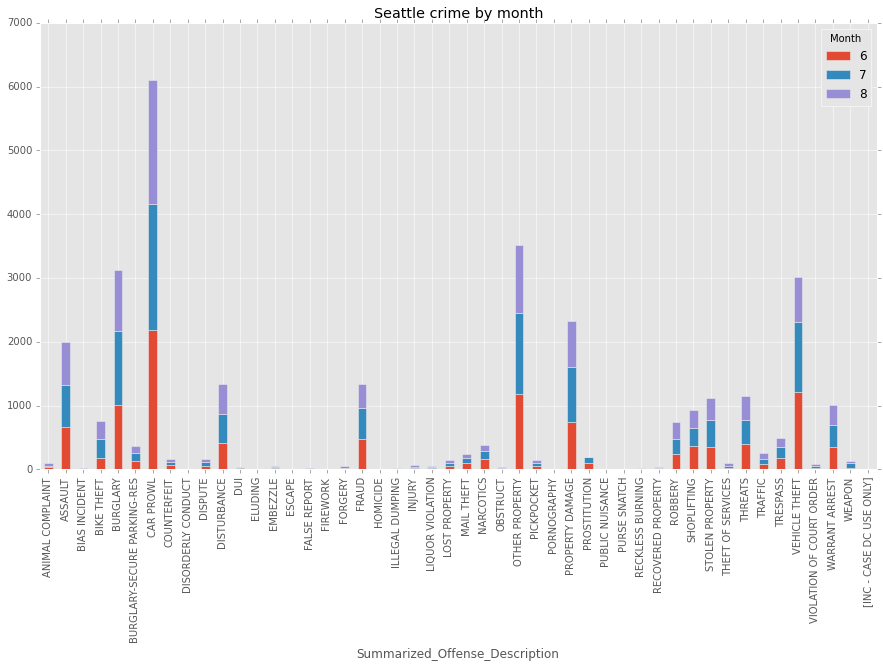

In [161]:
a=se.groupby(['Summarized_Offense_Description','Month']).size().unstack()
a.plot(kind='bar', stacked=True)
plt.title('Seattle crime by month')
plt.show()

## CRIME IN SAN FRANCISCO REMAINED CONSTANT OVER THE SUMMER MONTHS OF 2014



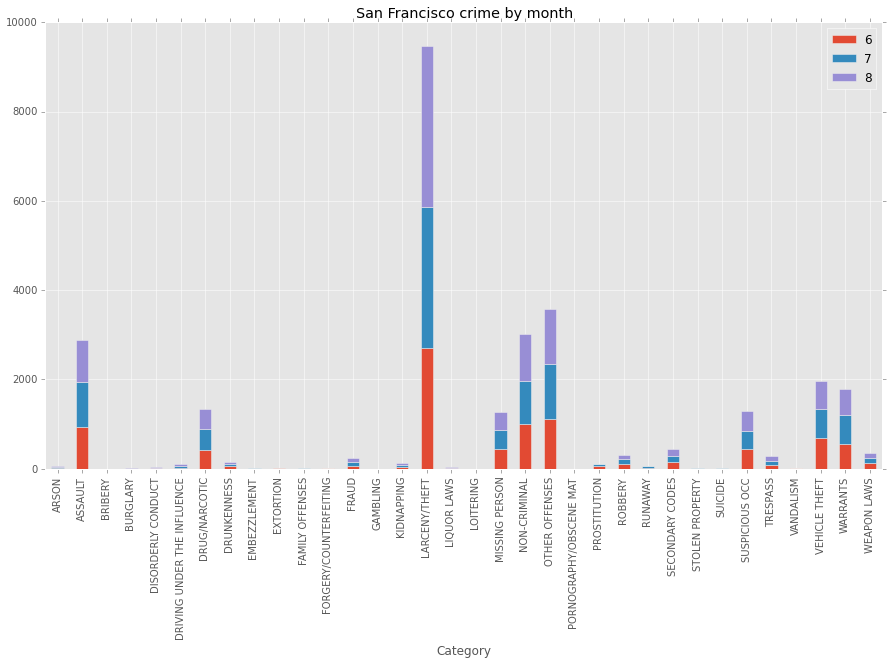

In [162]:
sf['Date']=pd.to_datetime(sf['Date'],errors='coerce')
sf.index=sf['Date']
b=sf.groupby(['Category',sf.index.month]).size().unstack()
b.plot(kind='bar', stacked=True)
plt.title('San Francisco crime by month')
plt.show()

### We now focus on SE. Top 15 crimes in SE are 

In [163]:
from heapq import nlargest
se_count=se.groupby('Summarized_Offense_Description').count() 
se_top15=se_count.nlargest(15, 'Offense_Code')
print se_top15['Offense_Code']
print se_top15.index

Summarized_Offense_Description
CAR PROWL          6107
OTHER PROPERTY     3523
BURGLARY           3118
VEHICLE THEFT      3015
PROPERTY DAMAGE    2322
ASSAULT            2002
FRAUD              1331
DISTURBANCE        1330
THREATS            1157
STOLEN PROPERTY    1118
WARRANT ARREST     1015
SHOPLIFTING         936
BIKE THEFT          758
ROBBERY             734
TRESPASS            486
Name: Offense_Code, dtype: int64
Index([u'CAR PROWL', u'OTHER PROPERTY', u'BURGLARY', u'VEHICLE THEFT',
       u'PROPERTY DAMAGE', u'ASSAULT', u'FRAUD', u'DISTURBANCE', u'THREATS',
       u'STOLEN PROPERTY', u'WARRANT ARREST', u'SHOPLIFTING', u'BIKE THEFT',
       u'ROBBERY', u'TRESPASS'],
      dtype='object', name=u'Summarized_Offense_Description')


## In Seattle, most crime incidents happen between 6 AM to 6 PM. Not many between midnight and early morning

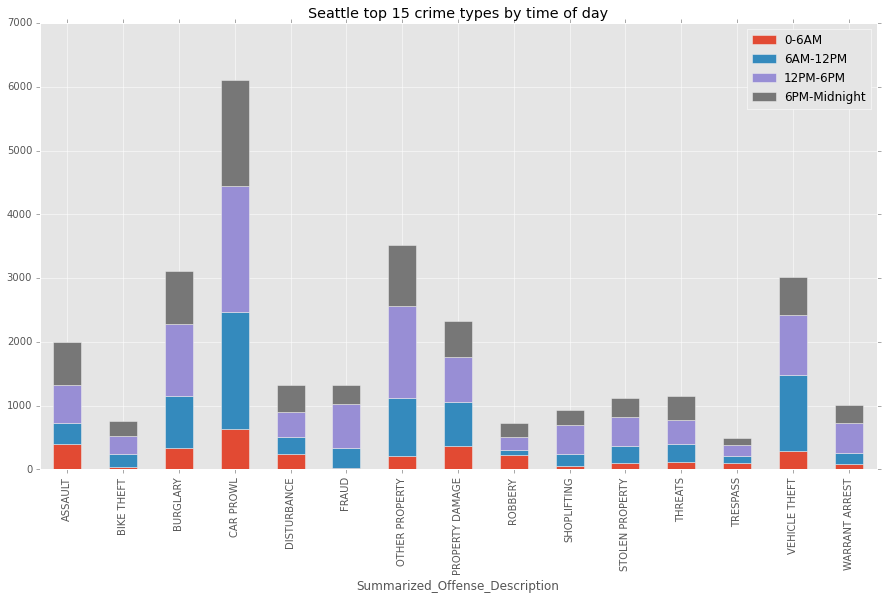

In [164]:
se['Time']=pd.to_datetime(se['Date_Reported'],errors='coerce')
se.index=se['Time']

data_se_top15= se[se['Summarized_Offense_Description'].isin(se_top15.index)]
c=data_se_top15.groupby(['Summarized_Offense_Description',data_se_top15.index.map(lambda t : t.hour/6)]).size().unstack()
p = c.plot(kind='bar', stacked=True) 
patches, labels = p.get_legend_handles_labels()
p.legend(patches, ['0-6AM','6AM-12PM','12PM-6PM','6PM-Midnight'], loc='best')
plt.title('Seattle top 15 crime types by time of day')
plt.show() 

## In Seattle, the most common crimes in the evening are car prowl, other property and burglary. 

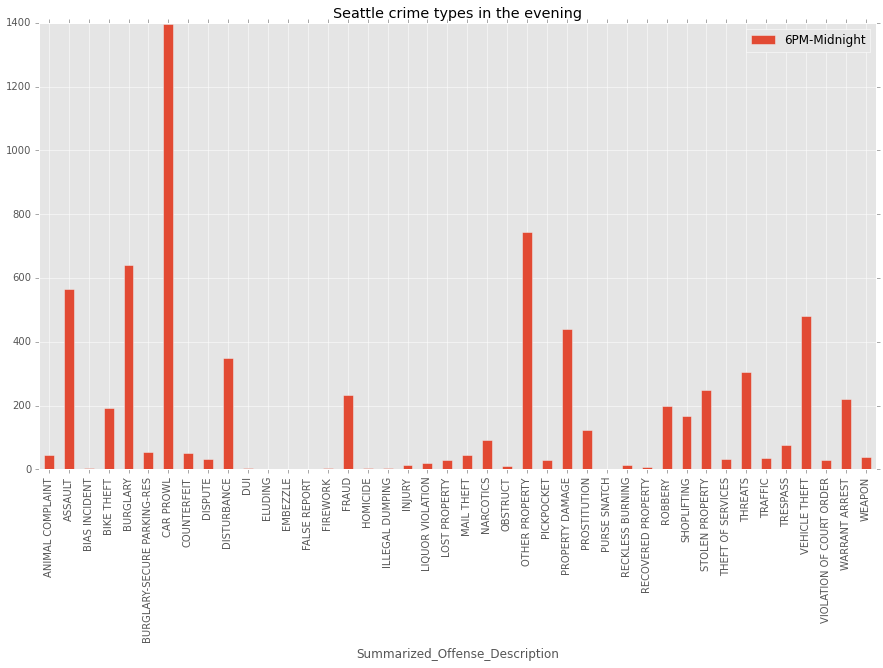

In [165]:
data_se_evening=se[(se.index.hour<24) & (se.index.hour>18)]
se_evening_crime=data_se_evening.groupby(['Summarized_Offense_Description']).size() 
p = se_evening_crime.plot(kind='bar') 
patches, labels = p.get_legend_handles_labels()
p.legend(patches, ['6PM-Midnight'], loc='best')
plt.title('Seattle crime types in the evening')
plt.show() 

## In Seattle, car prowl is the worst in district M. 

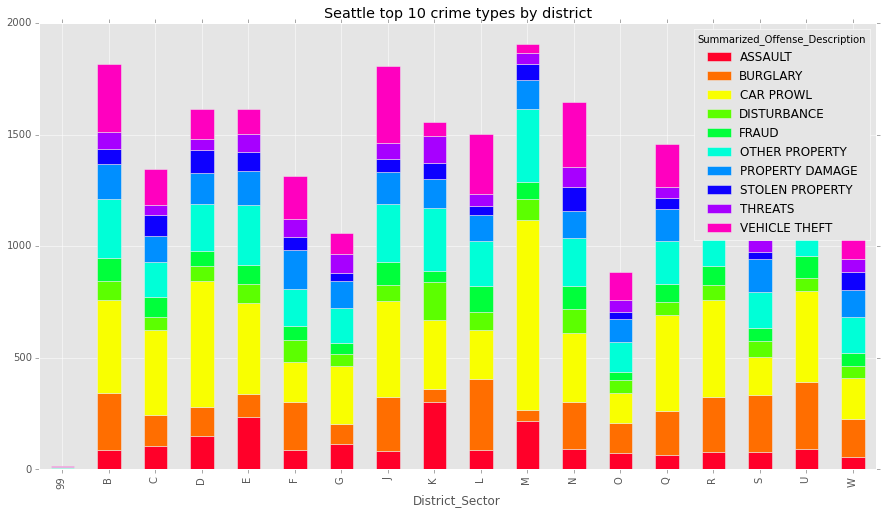

In [166]:
from itertools import cycle, islice
my_colors=[(x/10.0, x/10, x/10) for x in range(10)] 
se_top10=se_count.nlargest(10, 'Offense_Code')
data_se_top10= se[se['Summarized_Offense_Description'].isin(se_top10.index)]
c=data_se_top10.groupby(['District_Sector','Summarized_Offense_Description' ]).size().unstack()
p = c.plot(kind='bar', stacked=True,colormap='gist_rainbow') 
patches, labels = p.get_legend_handles_labels()
plt.title('Seattle top 10 crime types by district')
plt.show() 

## In Seattle, theft and robbery are the worst in districts B, J, L, N, U. 

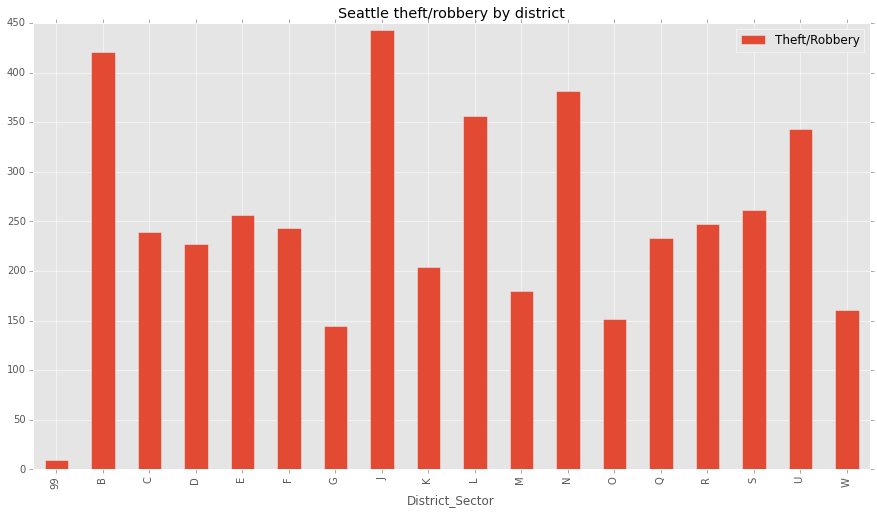

In [167]:
data_se_thef=se[se['Summarized_Offense_Description'].isin(['VEHICLE THEFT','BIKE THEFT', 'ROBBERY' ])]
se_evening_crime=data_se_thef.groupby(['District_Sector']).size() 
p = se_evening_crime.plot(kind='bar') 
patches, labels = p.get_legend_handles_labels()
p.legend(patches, ['Theft/Robbery'], loc='best')
plt.title('Seattle theft/robbery by district')
plt.show() 

### We now group the most 10 types by date

In [168]:
se_byDate=data_se_top10.groupby([data_se_top10.index.date,'Summarized_Offense_Description' ]).size().unstack()
se_byDate.head(10)

Summarized_Offense_Description,ASSAULT,BURGLARY,CAR PROWL,DISTURBANCE,FRAUD,OTHER PROPERTY,PROPERTY DAMAGE,STOLEN PROPERTY,THREATS,VEHICLE THEFT
2014-06-01,22.0,20.0,40.0,12.0,NaN,13.0,19.0,6.0,20.0,15.0
2014-06-02,11.0,41.0,70.0,22.0,13.0,21.0,20.0,6.0,14.0,24.0
2014-06-03,19.0,36.0,72.0,12.0,6.0,37.0,22.0,4.0,8.0,23.0
2014-06-04,30.0,50.0,48.0,20.0,10.0,32.0,13.0,8.0,12.0,35.0
2014-06-05,19.0,30.0,71.0,12.0,12.0,30.0,22.0,8.0,17.0,45.0
2014-06-06,30.0,25.0,65.0,6.0,8.0,28.0,37.0,7.0,10.0,33.0
2014-06-07,32.0,29.0,85.0,7.0,6.0,39.0,9.0,12.0,22.0,42.0
2014-06-08,31.0,26.0,55.0,14.0,8.0,55.0,10.0,10.0,12.0,26.0
2014-06-09,17.0,26.0,89.0,12.0,28.0,46.0,26.0,16.0,12.0,64.0
2014-06-10,21.0,39.0,73.0,23.0,20.0,34.0,12.0,13.0,18.0,42.0


## In Seattle, burglary and car prowl are highly correlated with other property on a day-to-day basis. 

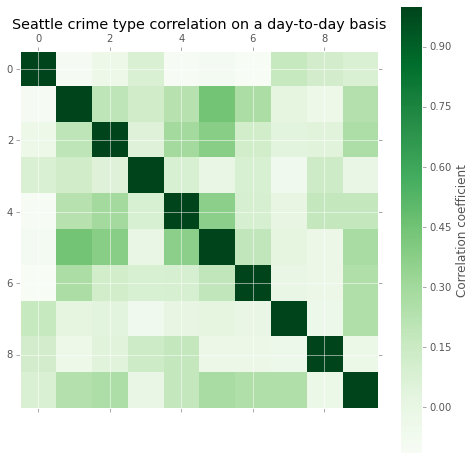

In [169]:
cor_crime =plt.matshow(se_byDate.corr(),cmap = plt.cm.Greens)
cb = plt.colorbar(cor_crime)
plt.title('Seattle crime type correlation on a day-to-day basis')
cb.set_label('Correlation coefficient')

## Summing all the top 10 crime types in Seattle, Monday has the highest crime rate and Thursday the lowest. (Monday is 0, Sunday is 6)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


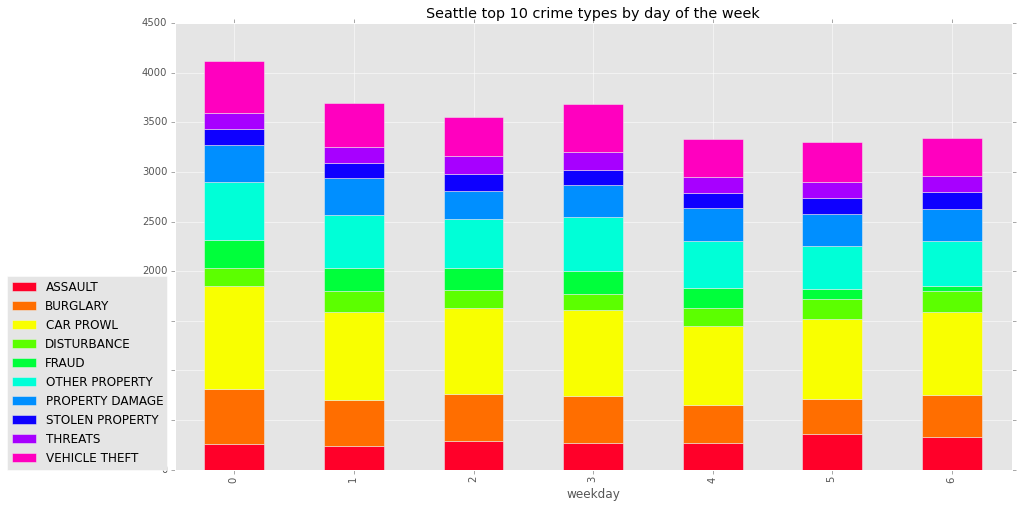

In [170]:
import datetime
data_se_top10['weekday'] = data_se_top10['Time'].dt.dayofweek

se_byDay=data_se_top10.groupby(['weekday','Summarized_Offense_Description' ]).size().unstack()
se_byDay.head(10)
p = se_byDay.plot(kind='bar', stacked=True,colormap='gist_rainbow') 
patches, labels = p.get_legend_handles_labels()
p.legend(patches, labels, loc=(-0.2,0))
plt.title('Seattle top 10 crime types by day of the week')
plt.show() 

### We now repeat the same analysis for SF. The 10 most common types of crime in SF are

In [171]:
sf_count=sf.groupby('Category').count() 
sf_top10=sf_count.nlargest(10, 'Date')
print sf_top10['Date']

Category
LARCENY/THEFT      9466
OTHER OFFENSES     3567
NON-CRIMINAL       3023
ASSAULT            2882
VEHICLE THEFT      1966
WARRANTS           1782
DRUG/NARCOTIC      1345
SUSPICIOUS OCC     1300
MISSING PERSON     1266
SECONDARY CODES     442
Name: Date, dtype: int64


## In SF, most crimes happen in the afternoon and evening, not the morning. This is different from SE. Theft is most common in the evening. 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


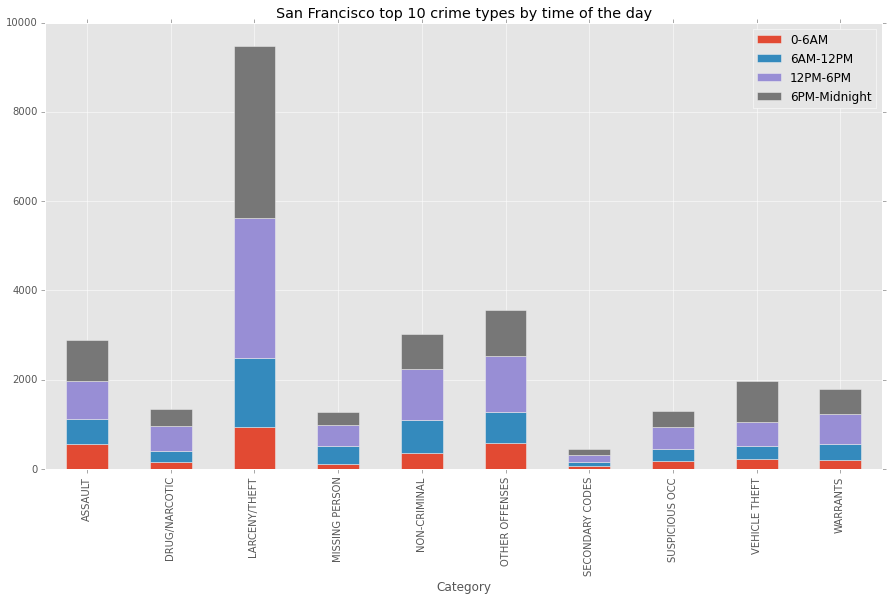

In [172]:
data_sf_top10= sf[sf['Category'].isin(sf_top10.index)]
data_sf_top10['Time']=pd.to_datetime(data_sf_top10['Time'])
c=data_sf_top10.groupby(['Category',data_sf_top10['Time'].map(lambda t : t.hour/6)]).size().unstack()
p = c.plot(kind='bar', stacked=True) 
patches, labels = p.get_legend_handles_labels()
p.legend(patches, ['0-6AM','6AM-12PM','12PM-6PM','6PM-Midnight'], loc='best')
plt.title('San Francisco top 10 crime types by time of the day')
plt.show() 

## The most common crimes in the evening in SF are Larceny/Theft, Assault, Vehicle Theft and Other Offenses

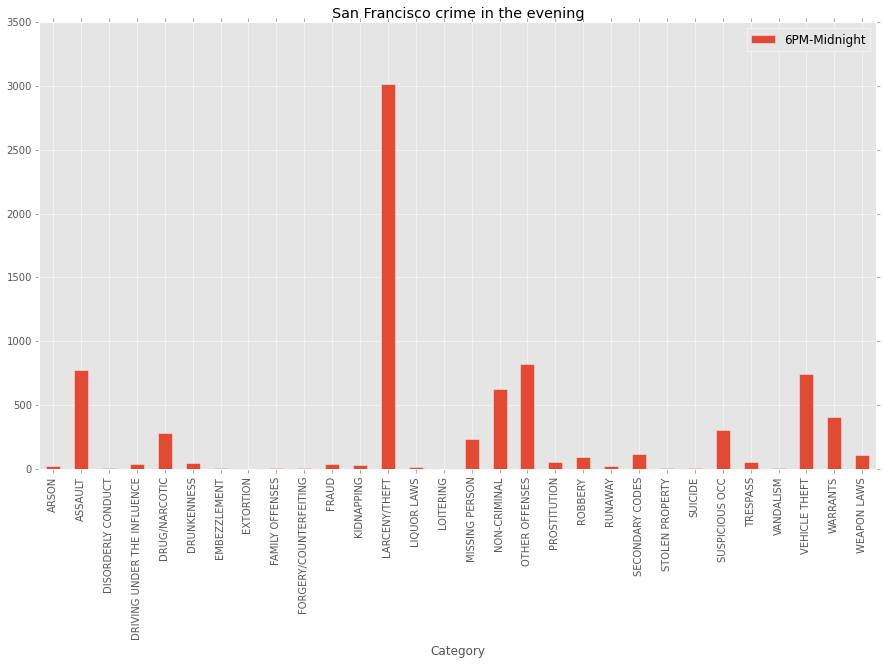

In [173]:
sf.index=pd.to_datetime(sf['Time']) 
data_sf_evening=sf[(sf.index.hour<24) & (sf.index.hour>18)]
sf_evening_crime=data_sf_evening.groupby(['Category']).size() 
p = sf_evening_crime.plot(kind='bar') 
patches, labels = p.get_legend_handles_labels()
p.legend(patches, ['6PM-Midnight'], loc='best')
plt.title('San Francisco crime in the evening')
plt.show() 

## The most unsafe district in SF is Southern. The safest are Park and Richmond. The most common crime in all districts is theft. 

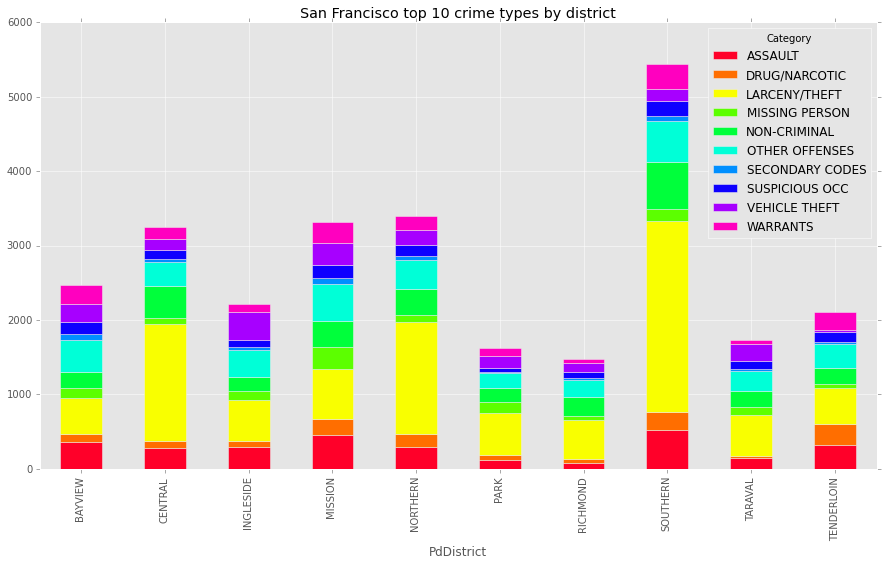

In [174]:
c=data_sf_top10.groupby(['PdDistrict','Category' ]).size().unstack()
p = c.plot(kind='bar', stacked=True,colormap='gist_rainbow') 
patches, labels = p.get_legend_handles_labels()
plt.title('San Francisco top 10 crime types by district')
plt.show() 

## In all districts of SF, crime goes up after 10 a.m.

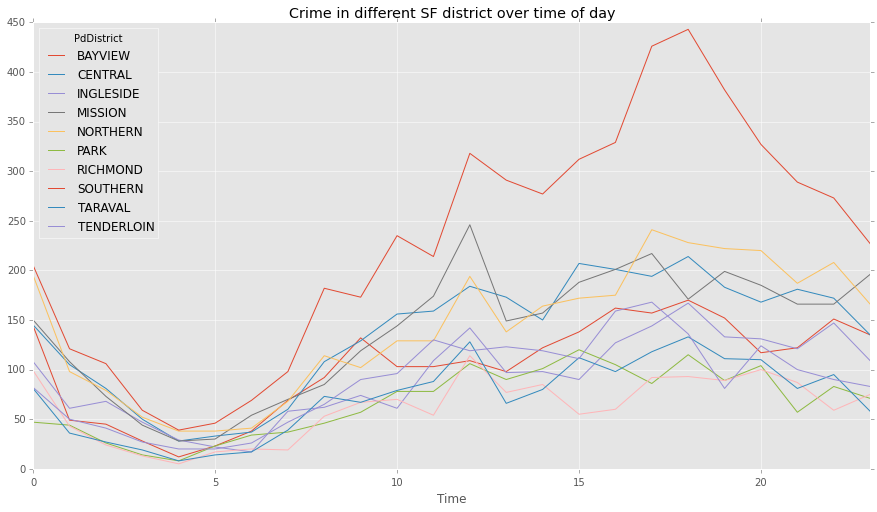

In [175]:
c=data_sf_top10.groupby([data_sf_top10['Time'].map(lambda t : t.hour),'PdDistrict']).size().unstack()

c.plot()
plt.title('Crime in different SF district over time of day')

### The 10 common types grouped by date 

In [176]:
sf_byDate=data_sf_top10.groupby([data_sf_top10.index.date,'Category' ]).size().unstack()
sf_byDate.head(10)

Category,ASSAULT,DRUG/NARCOTIC,LARCENY/THEFT,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,SECONDARY CODES,SUSPICIOUS OCC,VEHICLE THEFT,WARRANTS
2014-06-01,39.0,1.0,95.0,12.0,32.0,26.0,3.0,10.0,19.0,17.0
2014-06-02,43.0,16.0,82.0,10.0,24.0,45.0,5.0,16.0,14.0,24.0
2014-06-03,31.0,17.0,76.0,15.0,30.0,37.0,11.0,17.0,25.0,16.0
2014-06-04,36.0,16.0,91.0,23.0,36.0,50.0,5.0,27.0,26.0,36.0
2014-06-05,37.0,15.0,88.0,19.0,29.0,40.0,4.0,18.0,15.0,22.0
2014-06-06,33.0,9.0,111.0,15.0,34.0,35.0,6.0,13.0,23.0,7.0
2014-06-07,29.0,19.0,90.0,18.0,43.0,41.0,1.0,10.0,17.0,13.0
2014-06-08,21.0,5.0,83.0,8.0,32.0,24.0,6.0,18.0,19.0,11.0
2014-06-09,33.0,11.0,76.0,16.0,39.0,25.0,5.0,16.0,22.0,11.0
2014-06-10,30.0,16.0,72.0,13.0,40.0,41.0,6.0,12.0,18.0,18.0


## In SF, Other offenses and warrants are somewhat highly correlated with assault.

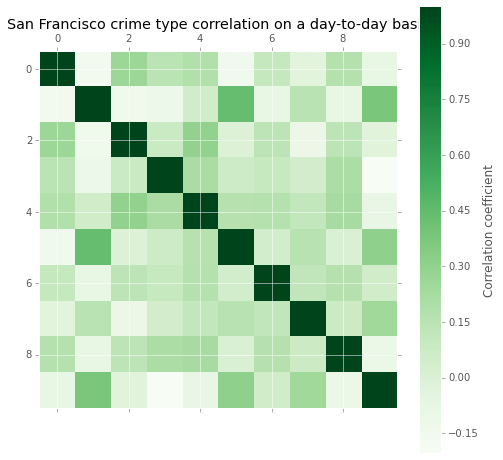

In [177]:
cor_crime =plt.matshow(sf_byDate.corr(),cmap = plt.cm.Greens)
cb = plt.colorbar(cor_crime)
plt.title('San Francisco crime type correlation on a day-to-day basis')
cb.set_label('Correlation coefficient')

## In SF, the crime rate is fairly constant over the week. This is different from the SE data. 

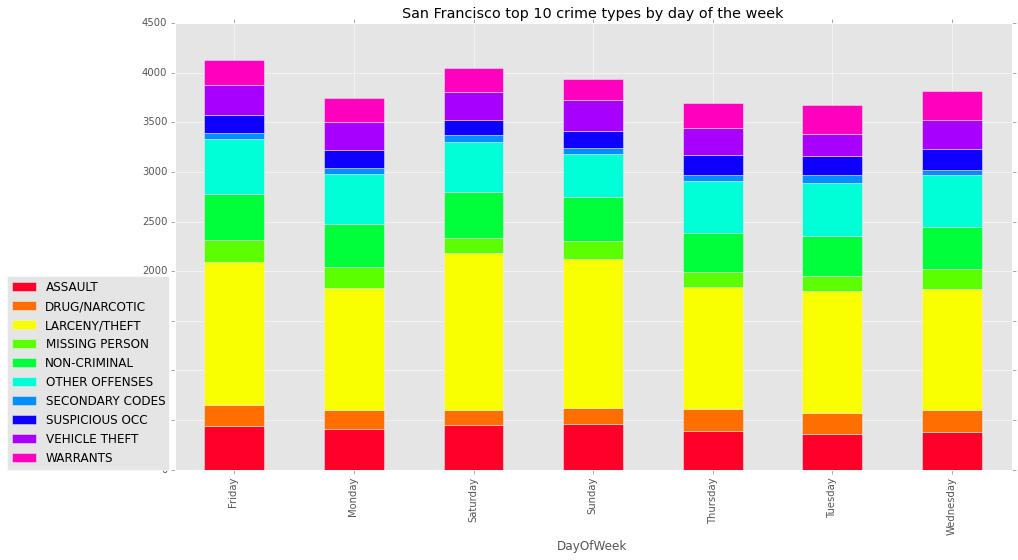

In [178]:
sf_byDay=data_sf_top10.groupby(['DayOfWeek','Category' ]).size().unstack()
p = sf_byDay.plot(kind='bar', stacked=True,colormap='gist_rainbow') 
patches, labels = p.get_legend_handles_labels()
p.legend(patches, labels, loc=(-0.2,0))
plt.title('San Francisco top 10 crime types by day of the week')
plt.show() 

### We now compare similar types of crime in the two cities:
#### - VEHICLE THEFT, ASSAULT, ROBBERY, PROSTITUTION, FRAUD, DISORDERLY CONDUCT, BURGLARY
#### - NARCOTICS (se) = DRUG/NARCOTIC (sf)
#### - WARRANT ARREST (se) = WARRANTS (sf)
#### - COUNTERFEIT (se) = FORGERY/COUNTERFEITING (sf)
#### - WEAPON (se) = WEAPON LAWS (sf)
#### - LIQUOR VIOLATIONS (se) = LIQUOR LAWS (sf)
#### - PROPERTY DAMAGE (se) = VANDALISM (sf) 
## Seattle has many more assault, fraud, drug and counterfeit cases than SF, but fewer prostitution and vandalism cases.  

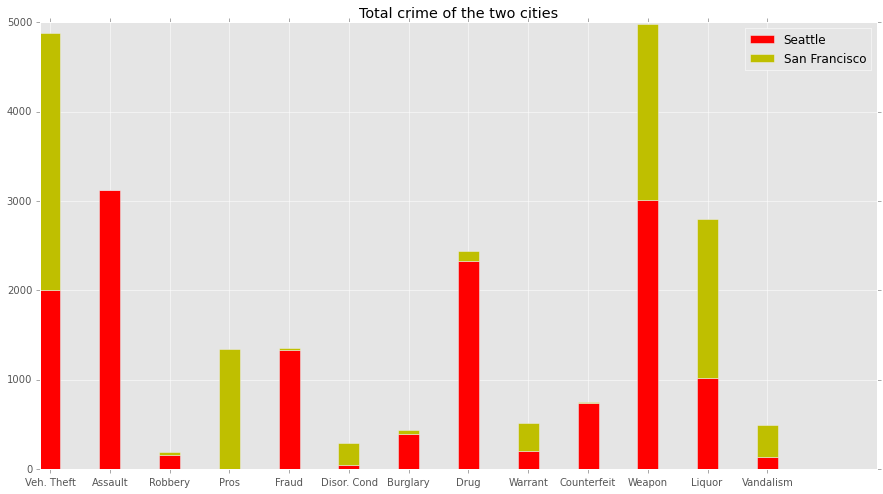

In [179]:
se_list=['VEHICLE THEFT', 'ASSAULT', 'ROBBERY', 'PROSTITUTION', 'FRAUD', 'DISORDERLY CONDUCT', 'BURGLARY','NARCOTICS',
         'WARRANT ARREST' ,'COUNTERFEIT'  , 'WEAPON', 'LIQUOR VIOLATION', 'PROPERTY DAMAGE']
sf_list=['VEHICLE THEFT', 'ASSAULT', 'ROBBERY', 'PROSTITUTION', 'FRAUD', 'DISORDERLY CONDUCT', 'BURGLARY','DRUG/NARCOTIC',
         'WARRANTS', 'FORGERY/COUNTERFEITING', 'WEAPON LAWS', 'LIQUOR LAWS', 'VANDALISM']
data_se_common= se[se['Summarized_Offense_Description'].isin(se_list)]
data_sf_common= sf[sf['Category'].isin(sf_list)]
c=data_se_common.groupby(['Summarized_Offense_Description']).size() 
d=data_sf_common.groupby(['Category']).size() 
ind = np.arange(len(se_list))
width = 0.35 
p1=plt.bar(ind, c.values, width, color='r')
p2=plt.bar(ind,d.values, width, color='y',bottom=c.values)
plt.title('Total crime of the two cities')
plt.legend((p1[0], p2[0]), ('Seattle', 'San Francisco'))
plt.xticks(ind + width/2., ('Veh. Theft', 'Assault', 'Robbery', 'Pros', 'Fraud', 'Disor. Cond', 'Burglary', 'Drug', 
                           'Warrant', 'Counterfeit', 'Weapon', 'Liquor', 'Vandalism'))
plt.show() 

## Per capita, Seattle is a much less safe city than San Francisco. 

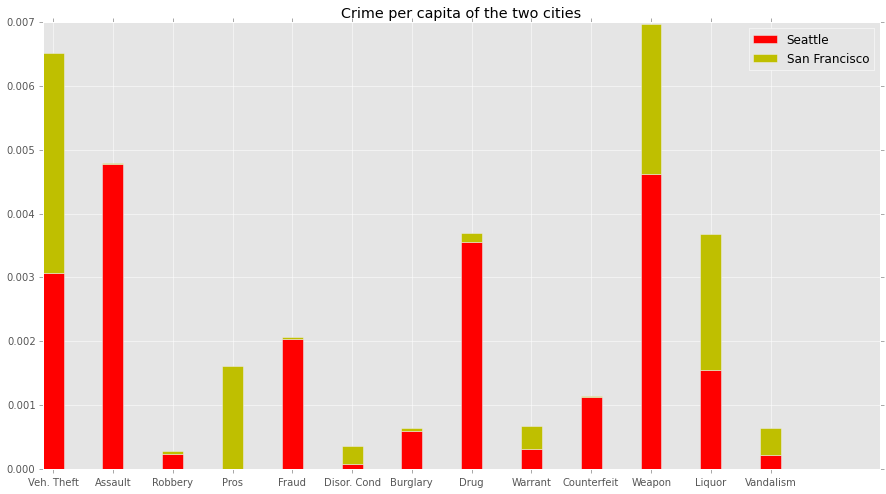

In [180]:
import math
se_population = 652000
sf_population = 837000
se_percap = [x / float(se_population) for x in c.values]
sf_percap = [x / float(sf_population) for x in d.values]
p1=plt.bar(ind, se_percap , width, color='r')
p2=plt.bar(ind,sf_percap , width, color='y',bottom=se_percap)
plt.title('Crime per capita of the two cities')
plt.legend((p1[0], p2[0]), ('Seattle', 'San Francisco'))
plt.xticks(ind + width/2., ('Veh. Theft', 'Assault', 'Robbery', 'Pros', 'Fraud', 'Disor. Cond', 'Burglary', 'Drug', 
                           'Warrant', 'Counterfeit', 'Weapon', 'Liquor', 'Vandalism'))
plt.show() 

## Crime remain constant in both cities. 

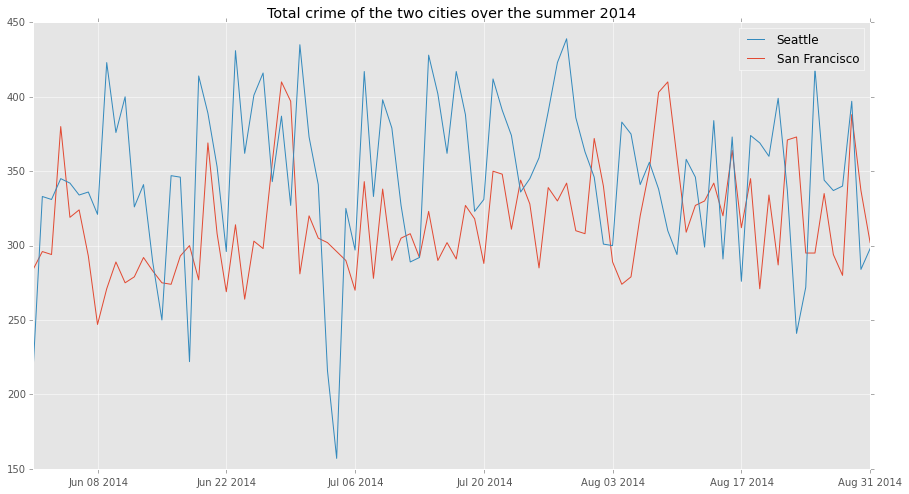

In [183]:
sf.index=pd.to_datetime(sf['Date']) 
sf_byDate_total=sf.groupby([sf.index.date]).size() 
se_byDate_total=se.groupby([se.index.date]).size() 

p2=plt.plot(sf_byDate_total.index,sf_byDate_total)
p1=plt.plot(se_byDate_total.index,se_byDate_total)
plt.title('Total crime of the two cities over the summer 2014')
plt.legend((p1[0], p2[0]), ('Seattle', 'San Francisco'))

### Map of vehicle theft incidents in Seattle. The shapefile of Seattle is in http://www.seattle.gov/dpd/cityplanning/populationdemographics/geographicfilesmaps/2010census/default.htm

## Vehicle theft is more common in the city center of Seattle

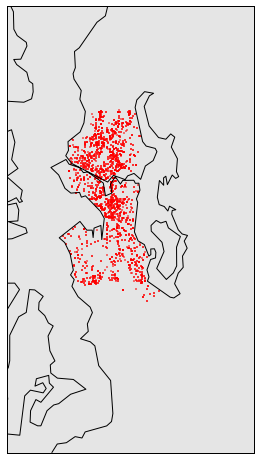

In [211]:
from mpl_toolkits.basemap import Basemap
import fiona
from itertools import chain
shp = fiona.open('seattleMap/kc_tract_10.shp')
bds = shp.bounds
shp.close()
extra = 0.0005
ll = (-122.516, 47.3096)
ur = (-122.064, 47.8616)
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

m = Basemap(
    projection='tmerc',
    ellps = 'WGS84',
    lat_0=47.58,
    lon_0=-122.29,
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - extra + extra * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + extra * h,
    lat_ts=0,
    resolution='h',
    suppress_ticks=True)

# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.drawmapboundary()
se_vehTheft=se[se['Summarized_Offense_Description']=='VEHICLE THEFT']
# Convert latitude and longitude to x and y coordinates
x, y = m(list(se_vehTheft["Longitude"].astype(float)), list(se_vehTheft["Latitude"].astype(float)))
# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()